### exercise b

In [36]:
from numpy import *
from matplotlib.pyplot import *
file_loc = "C:\Users\\vilde\Documents\\vmc_fermions\Output"

font = {'family' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

import seaborn as sns

sns.set_style('darkgrid')


### Initial position

0.20983901183602635


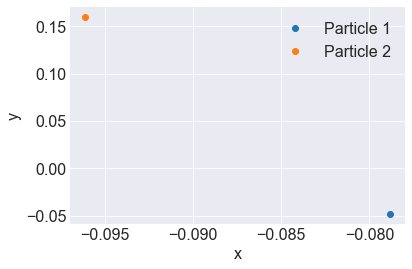

In [37]:
p1 = [-0.0788506 , -0.0488094]
p2 = [ -0.096081 , 0.160321]

plot(p1[0], p1[1], "o",  label="Particle 1")
plot(p2[0], p2[1],"o", label="Particle 2")
legend()
xlabel("x")
ylabel("y")
print sqrt((p1[0]-p2[0])**2+ (p1[1]-p2[1])**2)

## Gradient descent

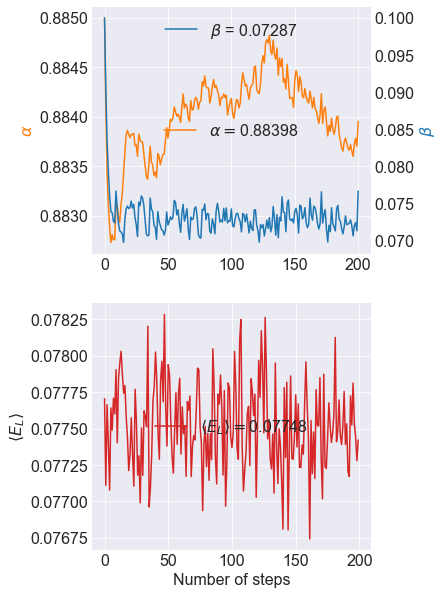

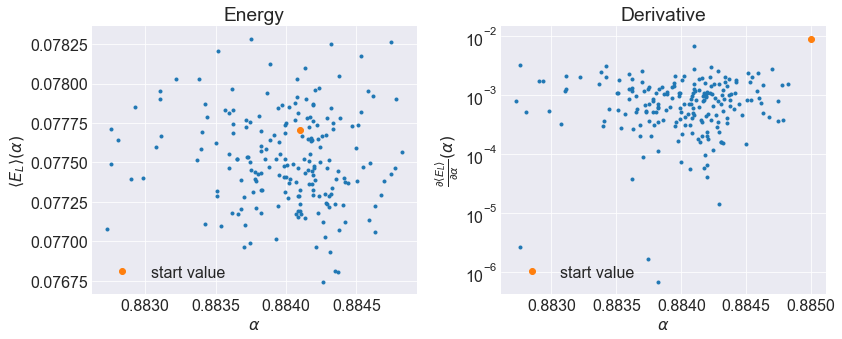

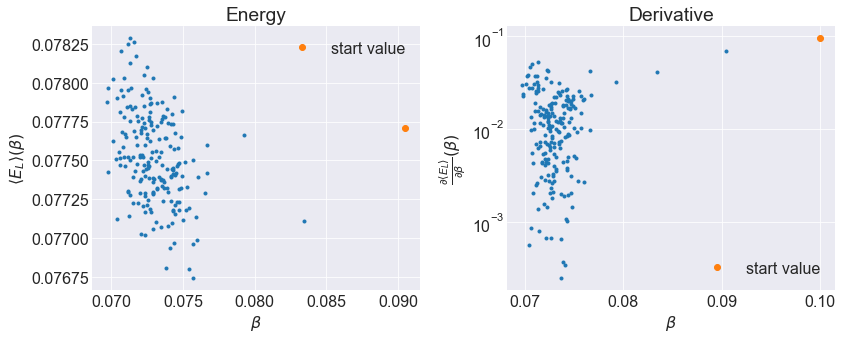

In [38]:
omega = 0.01
gamma = 0.5
alphastart = 1.0

if (omega == 1.0):
    betastart = 0.4
elif (omega == 0.5):
    betastart = 0.4
elif (omega == 0.1):
    betastart = 0.3
elif (omega == 0.05):
    betastart = 0.15
    alphastart = 0.93
    gamma = 0.1
elif (omega == 0.01):
    betastart = 0.1
    alphastart = 0.89
    gamma = 0.1

X = genfromtxt(file_loc + "\\exercise_e\\gradient_descent_interaction_p2_brute_force_omega_%i_alphastart_%i_betastart_%i_gamma_%i.txt"%(int(omega*100), int(alphastart*100), int(betastart*100), int(gamma*1000)), skip_header = 1)
# X = genfromtxt(file_loc + "\\exercise_e\\gradient_descent_interaction_p2_omega_%i_alphastart_%i_betastart_%i_gamma_%i.txt"%(int(omega*100), int(alphastart*100), int(betastart*100), int(gamma*1000)), skip_header = 1)

alpha = X[:,0]
beta = X[:,1]
energy = X[:,2]
derivative_alpha = X[:,3]
derivative_beta = X[:,4]

figure(figsize=(5,10))
ax1 = subplot(2,1,1)
ax2 = twinx(ax1)
ax1.plot(alpha, color="C1", label="$\\alpha = $%.5f"%mean(alpha[-50:]))
ax1.set_ylabel("$\\alpha$", color="C1")
ax2.plot(beta, label="$\\beta$ = %.5f"%mean(beta[-50:]))
ax2.set_ylabel("$\\beta$", color= "C0")
ax1.legend(loc=10)
ax2.legend(loc=9)
ax2.grid(False)
subplot(2,1,2)
plot(energy[1:], color = "C3", label="$\\left<E_L\\right> = $%.5f"%mean(energy[-50:]))
ylabel( "$\\left<E_L\\right>$")
xlabel("Number of steps")
legend(loc=10)

figure(figsize=(12,5))
subplot(1,2,1)
plot(alpha[1:], energy[1:], ".")
plot(alpha[1], energy[1], "o", label="start value")
legend()
title("Energy")
xlabel("$\\alpha$")
ylabel("$\\left<E_L\\right>(\\alpha)$")
# axhline(y=3, linestyle="--")
subplot(1,2,2)
title("Energy")
xlabel("$\\alpha$")
ylabel("$\\frac{\\partial \\left<E_L\\right>}{\\partial \\alpha}(\\alpha)$")
semilogy(alpha, abs(derivative_alpha), ".")
plot(alpha[0], abs(derivative_alpha[0]), "o", label="start value")
title("Derivative")
legend()
tight_layout()

figure(figsize=(12,5))
subplot(1,2,1)
plot(beta[1:], energy[1:], ".")
plot(beta[1], energy[1], "o", label="start value")
title("Energy")
# axhline(y=3, linestyle="--")
xlabel("$\\beta$")
ylabel("$\\left<E_L\\right>(\\beta)$")
legend()
subplot(1,2,2)
semilogy(beta, abs(derivative_beta), ".")
plot(beta[0], abs(derivative_beta[0]), "o", label="start value")
xlabel("$\\beta$")
ylabel("$\\frac{\\partial \\left<E_L\\right>}{\\partial \\beta}(\\beta)$")
title("Derivative")
legend()
tight_layout()


## Gradient descent with importance

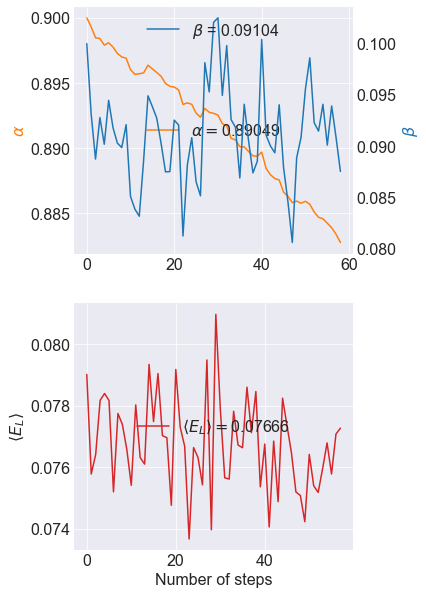

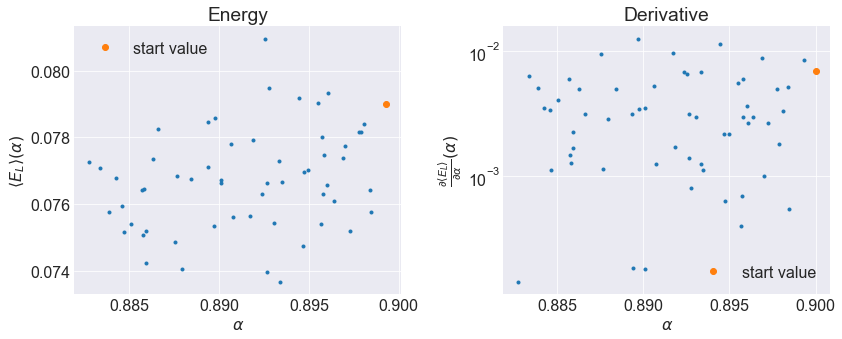

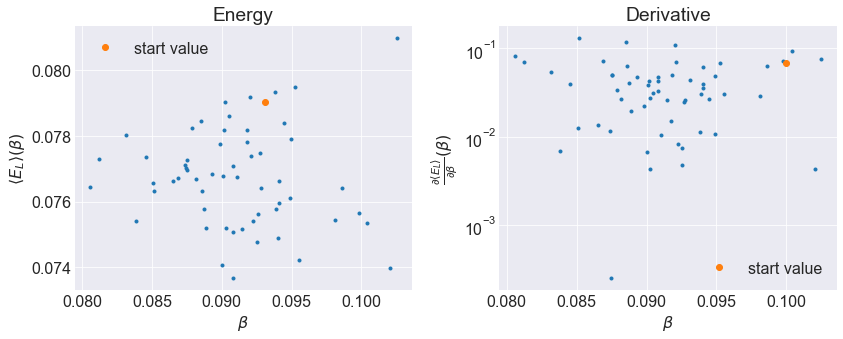

In [54]:
omega = 0.01

gamma = 0.2
alphastart = 1.0
betastart = 0.4

if (omega == 1.0):
    alphastart = 0.95
    betastart = 0.4
    gamma = 0.2
# elif (omega == 0.5):
#     betastart = 0.4
# elif (omega == 0.1):
# #     betastart = 0.18
# #     alphastart = 0.95
# #     gamma = 0.2 
# #     betastart = 0.21
# #     alphastart = 0.94
# #     gamma = 0.1
# elif (omega == 0.05):
# #     betastart = 0.14
# #     alphastart = 0.93
# #     gamma = 0.2
# #     betastart = 0.18
# #     alphastart = 0.93
#     gamma = 0.1
elif (omega == 0.01):
    betastart = 0.1
    alphastart = 0.90
    gamma = 0.1

X = genfromtxt(file_loc + "\\exercise_e\\gradient_descent_interaction_p2_importance_omega_%i_alphastart_%i_betastart_%i_gamma_%i_long.txt"%(int(omega*100), int(alphastart*100), int(betastart*100), int(gamma*1000)), skip_header = 1)

alpha = X[:,0]
beta = X[:,1]
energy = X[:,2]
derivative_alpha = X[:,3]
derivative_beta = X[:,4]

figure(figsize=(5,10))
ax1 = subplot(2,1,1)
ax2 = twinx(ax1)
ax1.plot(alpha, color="C1", label="$\\alpha = $%.5f"%mean(alpha[-50:]))
ax1.set_ylabel("$\\alpha$", color="C1")
ax2.plot(beta, label="$\\beta$ = %.5f"%mean(beta[-50:]))
ax2.set_ylabel("$\\beta$", color= "C0")
ax1.legend(loc=10)
ax2.legend(loc=9)
ax2.grid(False)
subplot(2,1,2)
plot(energy[1:], color = "C3", label="$\\left<E_L\\right> = $%.5f"%mean(energy[-50:]))
ylabel( "$\\left<E_L\\right>$")
xlabel("Number of steps")
legend(loc=10)

figure(figsize=(12,5))
subplot(1,2,1)
plot(alpha[1:], energy[1:], ".")
plot(alpha[1], energy[1], "o", label="start value")
legend()
title("Energy")
xlabel("$\\alpha$")
ylabel("$\\left<E_L\\right>(\\alpha)$")
# axhline(y=3, linestyle="--")
subplot(1,2,2)
title("Energy")
xlabel("$\\alpha$")
ylabel("$\\frac{\\partial \\left<E_L\\right>}{\\partial \\alpha}(\\alpha)$")
semilogy(alpha, abs(derivative_alpha), ".")
plot(alpha[0], abs(derivative_alpha[0]), "o", label="start value")
title("Derivative")
legend()
tight_layout()

figure(figsize=(12,5))
subplot(1,2,1)
plot(beta[1:], energy[1:], ".")
plot(beta[1], energy[1], "o", label="start value")
title("Energy")
# axhline(y=3, linestyle="--")
xlabel("$\\beta$")
ylabel("$\\left<E_L\\right>(\\beta)$")
legend()
subplot(1,2,2)
semilogy(beta, abs(derivative_beta), ".")
plot(beta[0], abs(derivative_beta[0]), "o", label="start value")
xlabel("$\\beta$")
ylabel("$\\frac{\\partial \\left<E_L\\right>}{\\partial \\beta}(\\beta)$")
title("Derivative")
legend()
tight_layout()


### Gradient descent - one parameter

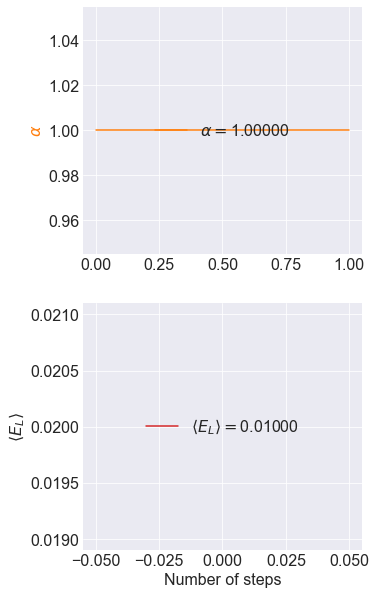

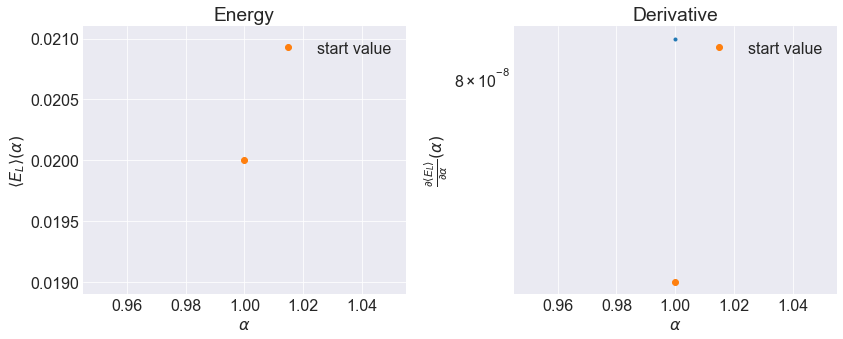

In [40]:
omega = 0.01
gamma = 0.5
alphastart = 1.0

X = genfromtxt(file_loc + "\\exercise_e\\gradient_descent_p2_omega_%i_alphastart_%i_gamma_%i.txt"%(int(omega*100), int(alphastart*100), int(gamma*1000)), skip_header = 1)

alpha = X[:,0]
energy = X[:,1]
derivative_alpha = X[:,2]


figure(figsize=(5,10))
ax1 = subplot(2,1,1)
ax1.plot(alpha, color="C1", label="$\\alpha = $%.5f"%mean(alpha[-50:]))
ax1.set_ylabel("$\\alpha$", color="C1")
ax1.legend(loc=10)
subplot(2,1,2)
plot(energy[1:], color = "C3", label="$\\left<E_L\\right> = $%.5f"%mean(energy[-50:]))
ylabel( "$\\left<E_L\\right>$")
xlabel("Number of steps")
legend(loc=10)

figure(figsize=(12,5))
subplot(1,2,1)
plot(alpha[1:], energy[1:], ".")
plot(alpha[1], energy[1], "o", label="start value")
legend()
title("Energy")
xlabel("$\\alpha$")
ylabel("$\\left<E_L\\right>(\\alpha)$")
# axhline(y=3, linestyle="--")
subplot(1,2,2)
title("Energy")
xlabel("$\\alpha$")
ylabel("$\\frac{\\partial \\left<E_L\\right>}{\\partial \\alpha}(\\alpha)$")
semilogy(alpha, abs(derivative_alpha), ".")
plot(alpha[0], abs(derivative_alpha[0]), "o", label="start value")
title("Derivative")
legend()
tight_layout()


### One-body density

400 400


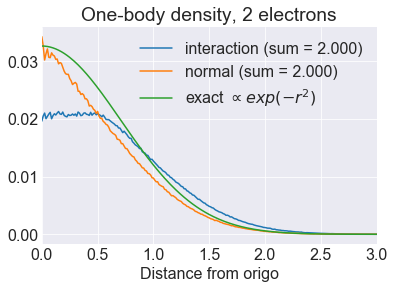

In [41]:
Ni = genfromtxt(file_loc + "\\test_interaction_0_density.txt",usecols=(0, 1))
Ni_normal = genfromtxt(file_loc + "\\test_0_density.txt",usecols=(0, 1))

r = Ni[:,0]
density = Ni[:,1]
r_normal = Ni_normal[:,0]
density_normal = Ni_normal[:,1]
delta_r = r[1]-r[0];



figure()

for i in range(len(Ni[:,0])):
    density[i] = density[i]/(pi*(r[i]+delta_r)**2-pi*r[i]**2);
    
for j in range(len(Ni_normal[:,0])):
    density_normal[j] = density_normal[j]/(pi*(r[j]+delta_r)**2-pi*r[j]**2);

A = 2*sum(density)**(-1)
A_normal = 2*sum(density_normal)**(-1)


plot(r, A*density, '-', label="interaction (sum = %.3f)"%(sum(A*density)))
plot(r_normal, A_normal*density_normal, '-', label="normal (sum = %.3f)"%(sum(A_normal*density_normal)))
plot(r, A_normal*density_normal[1]*exp(-r**2), label="exact $\propto exp(-r^2)$")
xlim([0,3])
title("One-body density, 2 electrons")
xlabel("Distance from origo") 
legend()

print len(r), len(r_normal)

In [42]:
Kinetic_energy = 0.932119
Potential_energy = 1.31176
Interaction_energy = 0.758955
    
print Kinetic_energy/(Potential_energy)

0.710586540221


Skal være 1 fordi det er $0.5*2$(potensen), funker ikke med interaction.

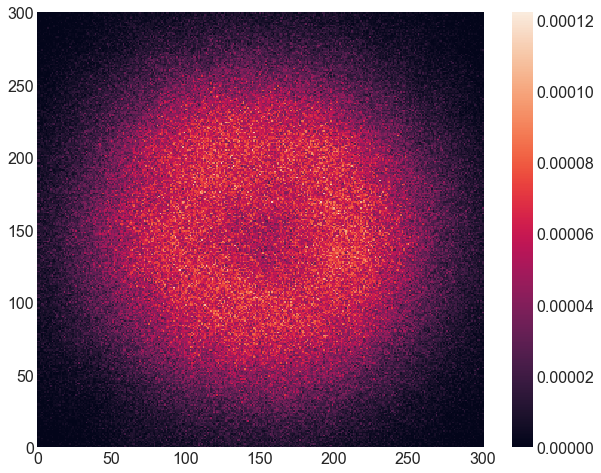

In [43]:
M = genfromtxt(file_loc + "\\exercise_d//ground_state_importance_6p_omega_100_alpha_95_density.txt")


figure(figsize=(10,8))
pcolormesh(M/(2**22))#, vmin=-100, vmax=100)
colorbar()
# savefig("..//Results/interaction_two_electrons.png")

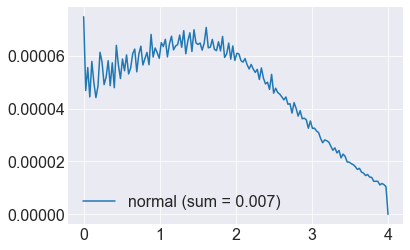

In [44]:
r = linspace(0,len(M[:,0])/2,len(M[:,0])/2)

counts = zeros(len(M[:,0])/2)

for k in range(len(counts)-1):
    for i in range(len(M[:,0])):
        for j in range(len(M[:,0])):
            x = float(i - len(M[:,0])/2)
            y = float(j - len(M[:,0])/2)
            r_M = sqrt(x*x+y*y)
            if (r_M >= r[k] and r_M < r[k+1]):
                counts[k] += M[i][j]/(2**(22))
    counts[k] /= (pi*(r[k+1])**2-pi*r[k]**2)


r = r/(len(M[:,0])/2)*4.0
figure()
plot(r,counts, label="normal (sum = %.3f)"%(sum(counts)))         
# plot(r, counts[0]*exp(-r**2), label="exact $\propto exp(-r^2)$")
legend()
# print counts

## Exercise d - importance sampling - compare

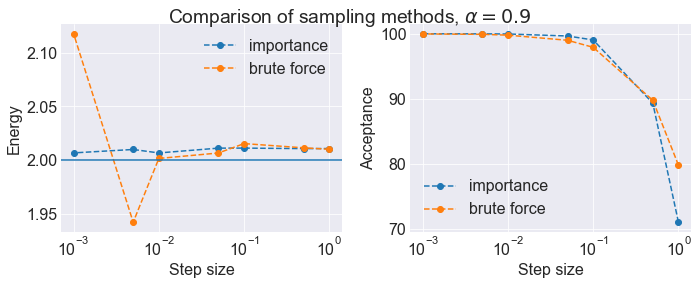

In [45]:
I = loadtxt(file_loc + "\\exercise_d\\analytical_2p_2d_importance.txt", skiprows = 1)
B = loadtxt(file_loc + "\\exercise_d\\analytical_2p_2d_brute_force.txt", skiprows = 1)

figure(figsize=(10,4))
suptitle("Comparison of sampling methods, $\\alpha = 0.9$", y=1.0)
subplot(1,2,1)
semilogx(I[:,0], I[:,2],"o--", label="importance")
semilogx(B[:,0], B[:,2],"o--", label="brute force")
axhline(y=2.0)
xlabel("Step size")
ylabel("Energy")
legend()
subplot(1,2,2)
semilogx(I[:,0], I[:,1],"o--", label="importance")
semilogx(B[:,0], B[:,1],"o--", label="brute force")
xlabel("Step size")
ylabel("Acceptance")
legend()
tight_layout()
savefig("..\Results\comparing_sampling.png")

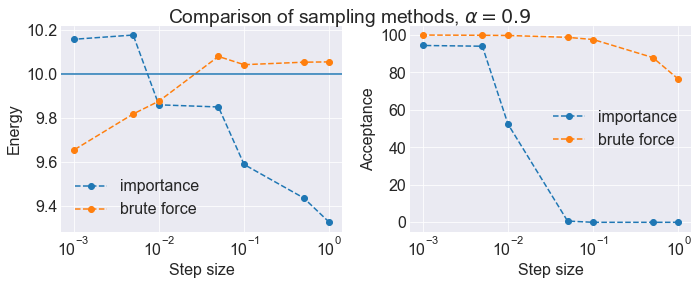

In [46]:
I = loadtxt(file_loc + "\\exercise_d\\analytical_6p_2d_importance.txt", skiprows = 1)
B = loadtxt(file_loc + "\\exercise_d\\analytical_6p_2d_brute_force.txt", skiprows = 1)

figure(figsize=(10,4))
suptitle("Comparison of sampling methods, $\\alpha = 0.9$", y=1.0)
subplot(1,2,1)
semilogx(I[:,0], I[:,2],"o--", label="importance")
semilogx(B[:,0], B[:,2],"o--", label="brute force")
axhline(y=10.0)
xlabel("Step size")
ylabel("Energy")
legend()
subplot(1,2,2)
semilogx(I[:,0], I[:,1],"o--", label="importance")
semilogx(B[:,0], B[:,1],"o--", label="brute force")
xlabel("Step size")
ylabel("Acceptance")
legend()
tight_layout()

## Gradient descent - which minimization rate?

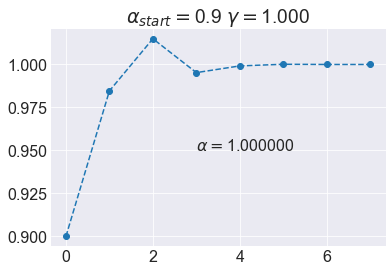

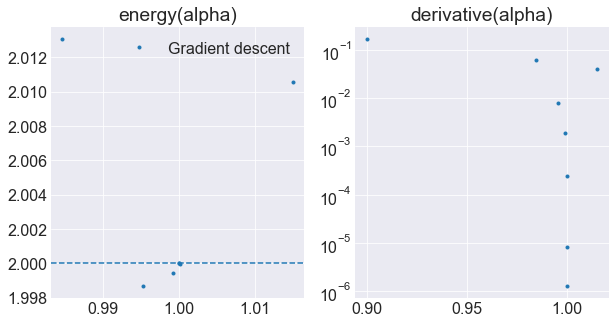

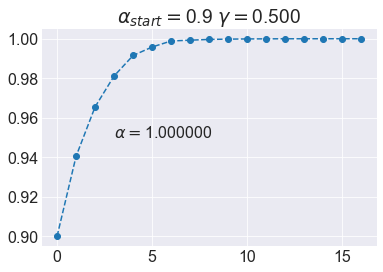

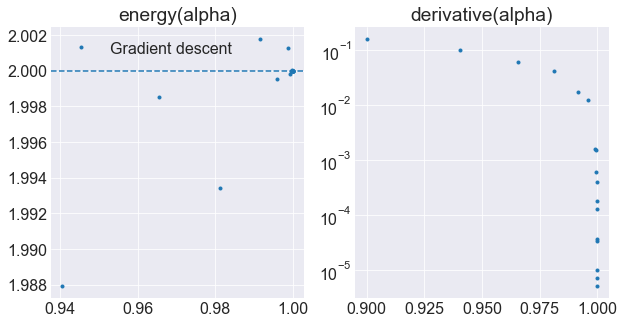

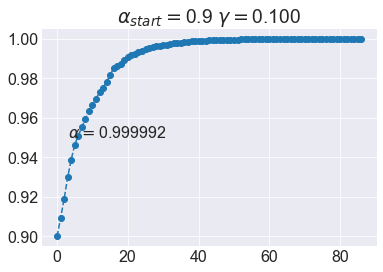

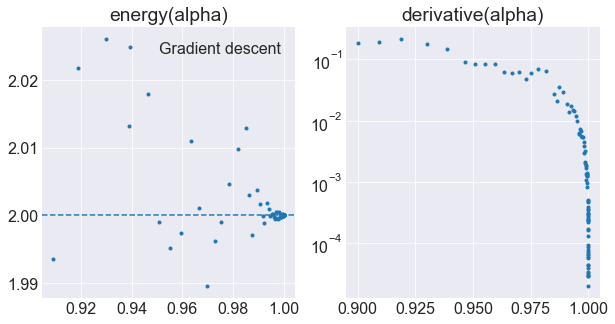

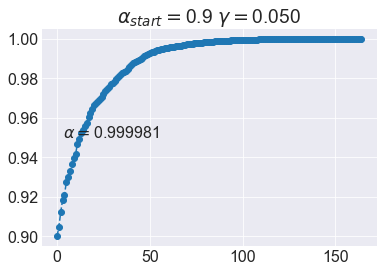

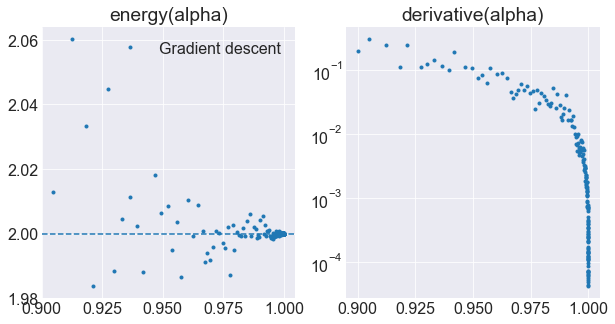

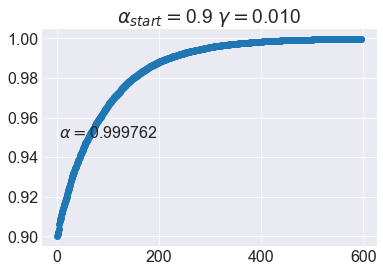

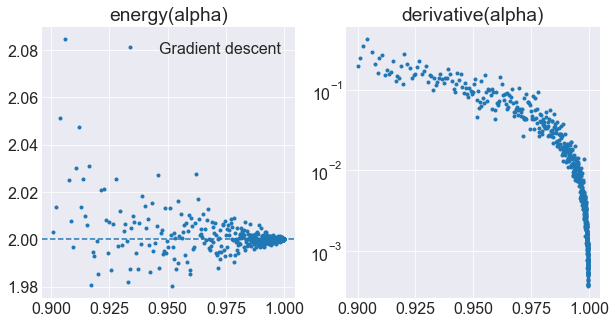

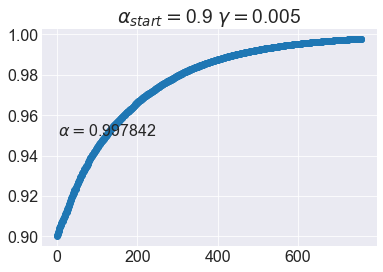

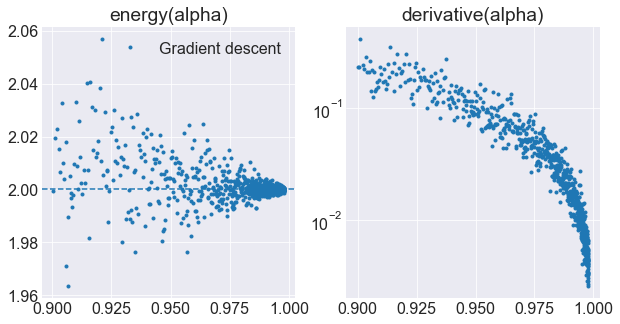

In [47]:
alphastart = [0.9]

gamma = [1.0, 0.5, 0.1, 0.05, 0.01, 0.005]

for i in range(len(gamma)):
    
    B = loadtxt(file_loc + "\\exercise_e\\gradient_descent_p2_alphastart_%i_gamma_%i.txt"%(int(alphastart[0]*100), int(gamma[i]*1000)), skiprows = 1)
    alpha = B[:,0]
    energy = B[:,1]
    derivative_alpha = B[:,2]

    figure()
    plot(alpha, "o--")
    title("$\\alpha_{start} = $%.1f $\gamma = $%.3f "%(alphastart[0], gamma[i]))
    text(3, 0.95, "$\\alpha = $%f"%alpha[-1])

    figure(figsize=(10,5))
    subplot(1,2,1)
    plot(alpha[1:], energy[1:], ".", label="Gradient descent")
    legend()
    title("energy(alpha)")
    axhline(y=2, linestyle="--")
    subplot(1,2,2)
    semilogy(alpha, abs(derivative_alpha), ".")
    title("derivative(alpha)")


The largest seems to be the best ones. Is that independant of the start value of $\alpha$?

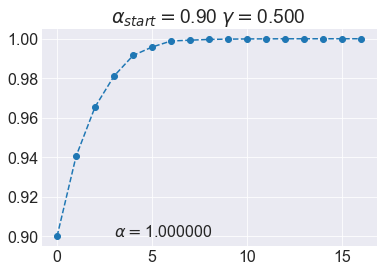

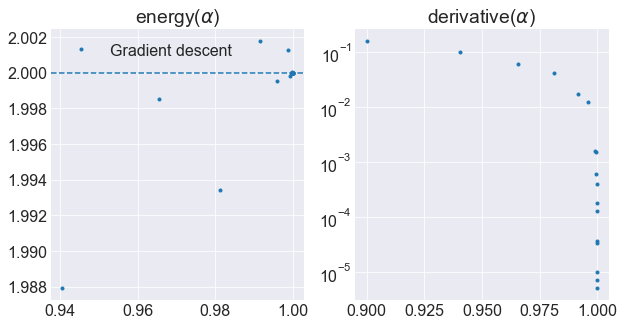

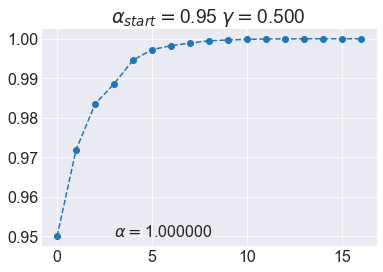

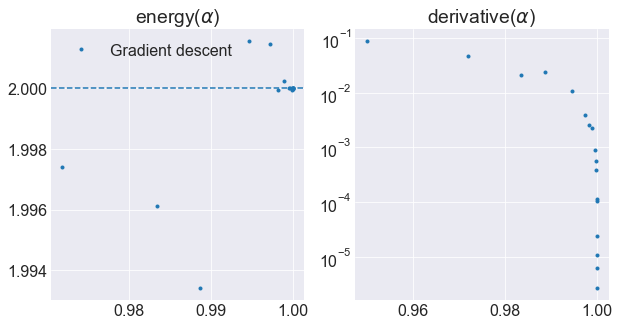

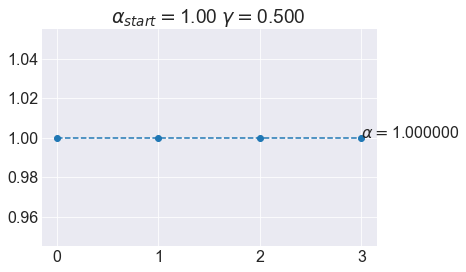

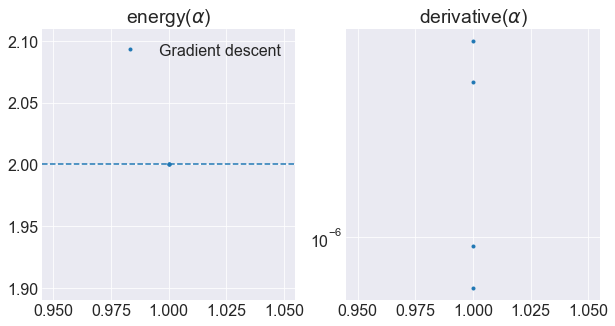

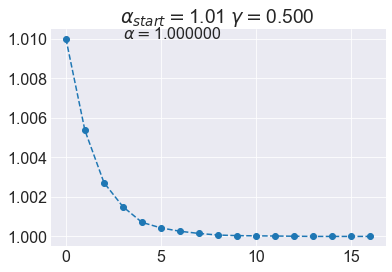

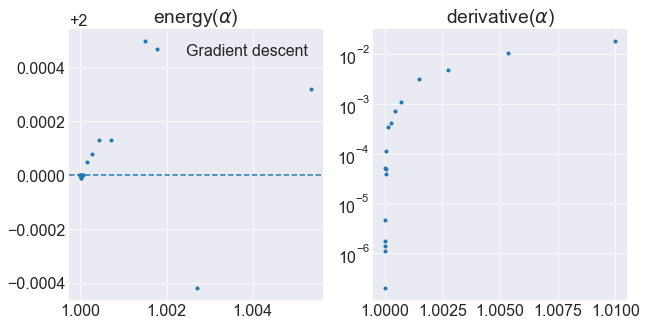

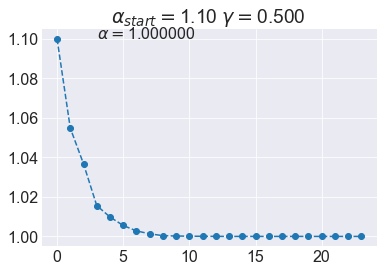

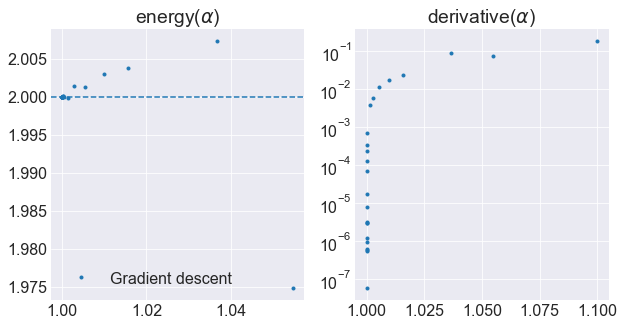

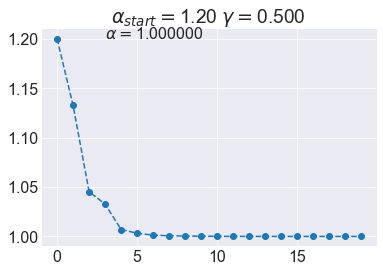

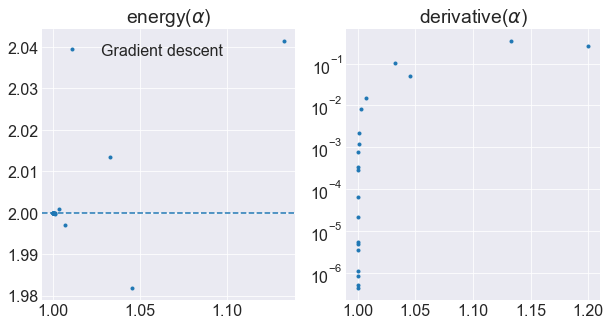

In [48]:
alphastart = [0.9, 0.95, 1.0, 1.01, 1.1, 1.2]

gamma = [0.5]#, 1.0]

for i in range(len(gamma)):
    
    for k in range(len(alphastart)):
    
        B = loadtxt(file_loc + "\\exercise_e\\gradient_descent_p2_alphastart_%i_gamma_%i.txt"%(int(alphastart[k]*100), int(gamma[i]*1000)), skiprows = 1)
        alpha = B[:,0]
        energy = B[:,1]
        derivative_alpha = B[:,2]

        figure()
        plot(alpha, "o--")
        title("$\\alpha_{start} = $%.2f $\gamma = $%.3f "%(alphastart[k], gamma[i]))
        text(3, alphastart[k], "$\\alpha = $%f"%alpha[-1])

        figure(figsize=(10,5))
        subplot(1,2,1)
        plot(alpha[1:], energy[1:], ".", label="Gradient descent")
        legend()
        title("energy($\\alpha$)")
        axhline(y=2, linestyle="--")
        subplot(1,2,2)
        semilogy(alpha, abs(derivative_alpha), ".")
        title("derivative($\\alpha$)")


It seems like if the guess is close to the correct value for $\alpha$ it is better with the smaller $\gamma = 0.5$. A bigger $\gamma$ could be good if the guess is far away from the correct one, but it seems to me like $\gamma=0.5$ works fairly well for that case too. It is strange that the energy is less than 2.0 for some values of $\alpha$ and some minimization rates. I think something is wrong in the code.

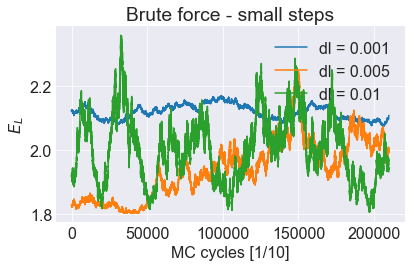

In [49]:
E = loadtxt("../Output//exercise_d//allEnergies//analytical_2d_2p_stepsize_5_MC_21_brute_force_energy.txt", skiprows=5)
E2 = loadtxt("../Output//exercise_d//allEnergies//analytical_2d_2p_stepsize_1_MC_21_brute_force_energy.txt", skiprows=5)
E3 = loadtxt("../Output//exercise_d//allEnergies//analytical_2d_2p_stepsize_10_MC_21_brute_force_energy.txt", skiprows=5)
E4 = loadtxt("../Output//exercise_d//allEnergies//analytical_2d_2p_stepsize_50_MC_21_brute_force_energy.txt", skiprows=5)

E_less = E[0::10]
E2_less = E2[0::10]
E3_less = E3[0::10]
E4_less = E4[0::10]

figure()
title("Brute force - small steps")
ylabel("$E_L$")
xlabel("MC cycles [1/10]")
plot(E2_less, label="dl = 0.001")
plot(E_less, label="dl = 0.005")
plot(E3_less, label="dl = 0.01")
# plot(E4_less, label="dl = 0.05")
legend()
tight_layout()
savefig("../Results/brute_force_small_steps.png")

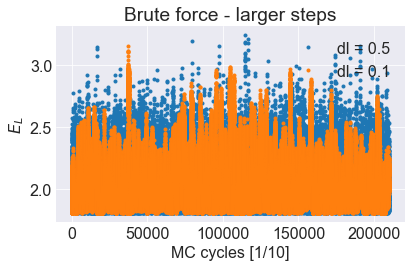

In [50]:
E = loadtxt("../Output//exercise_d//allEnergies//analytical_2d_2p_stepsize_500_MC_21_brute_force_energy.txt", skiprows=5)
E2 = loadtxt("../Output//exercise_d//allEnergies//analytical_2d_2p_stepsize_100_MC_21_brute_force_energy.txt", skiprows=5)


E_less = E[0::10]
E2_less = E2[0::10]

figure()
title("Brute force - larger steps")
ylabel("$E_L$")
xlabel("MC cycles [1/10]")
plot(E_less,"." ,label="dl = 0.5")
plot(E2_less,"." ,label="dl = 0.1")
legend()
tight_layout()
savefig("../Results/brute_force_larger_steps.png")

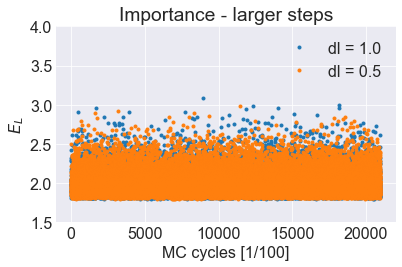

In [51]:
E = loadtxt("../Output//exercise_d//allEnergies//analytical_2d_2p_stepsize_500_MC_21_importance_energy.txt", skiprows=5)
E2 = loadtxt("../Output//exercise_d//allEnergies//analytical_2d_2p_stepsize_1000_MC_21_importance_energy.txt", skiprows=5)


E_less = E[0::100]
E2_less = E2[0::100]

figure()
title("Importance - larger steps")
ylabel("$E_L$")
xlabel("MC cycles [1/100]")
plot(E2_less,"." ,label="dl = 1.0")
plot(E_less,"." ,label="dl = 0.5")
legend()
tight_layout()
ylim([1.5, 4.0])
savefig("../Results/importance_larger_steps.png")

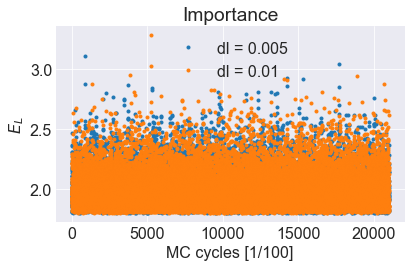

In [52]:
E = loadtxt("../Output//exercise_d//allEnergies//analytical_2d_2p_stepsize_5_MC_21_importance_energy.txt", skiprows=5)
E2 = loadtxt("../Output//exercise_d//allEnergies//analytical_2d_2p_stepsize_10_MC_21_importance_energy.txt", skiprows=5)


E_less = E[0::100]
E2_less = E2[0::100]

figure()
title("Importance")
ylabel("$E_L$")
xlabel("MC cycles [1/100]")
plot(E_less,"." ,label="dl = 0.005")
plot(E2_less,"." ,label="dl = 0.01")
legend()
tight_layout()
savefig("../Results/importance_smaller_steps.png")

Trying to run for importance sampling and dl = 0.5 to see the differences in the results:

MC = $2^{22}$:

E: 1.98728, 1.98762, 1.98745, 1.98751

MC = $2^{21}$:

E: 1.9877, 1.98796, 1.98755

Tried also some runs with dl = 1.0 and MC = $2^{21}$:

E: 2.01586, 2.01574, 2.01606, 2.01618

In [53]:
if(-5 < -4):
    print "yes"

yes
